In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("train.csv")
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


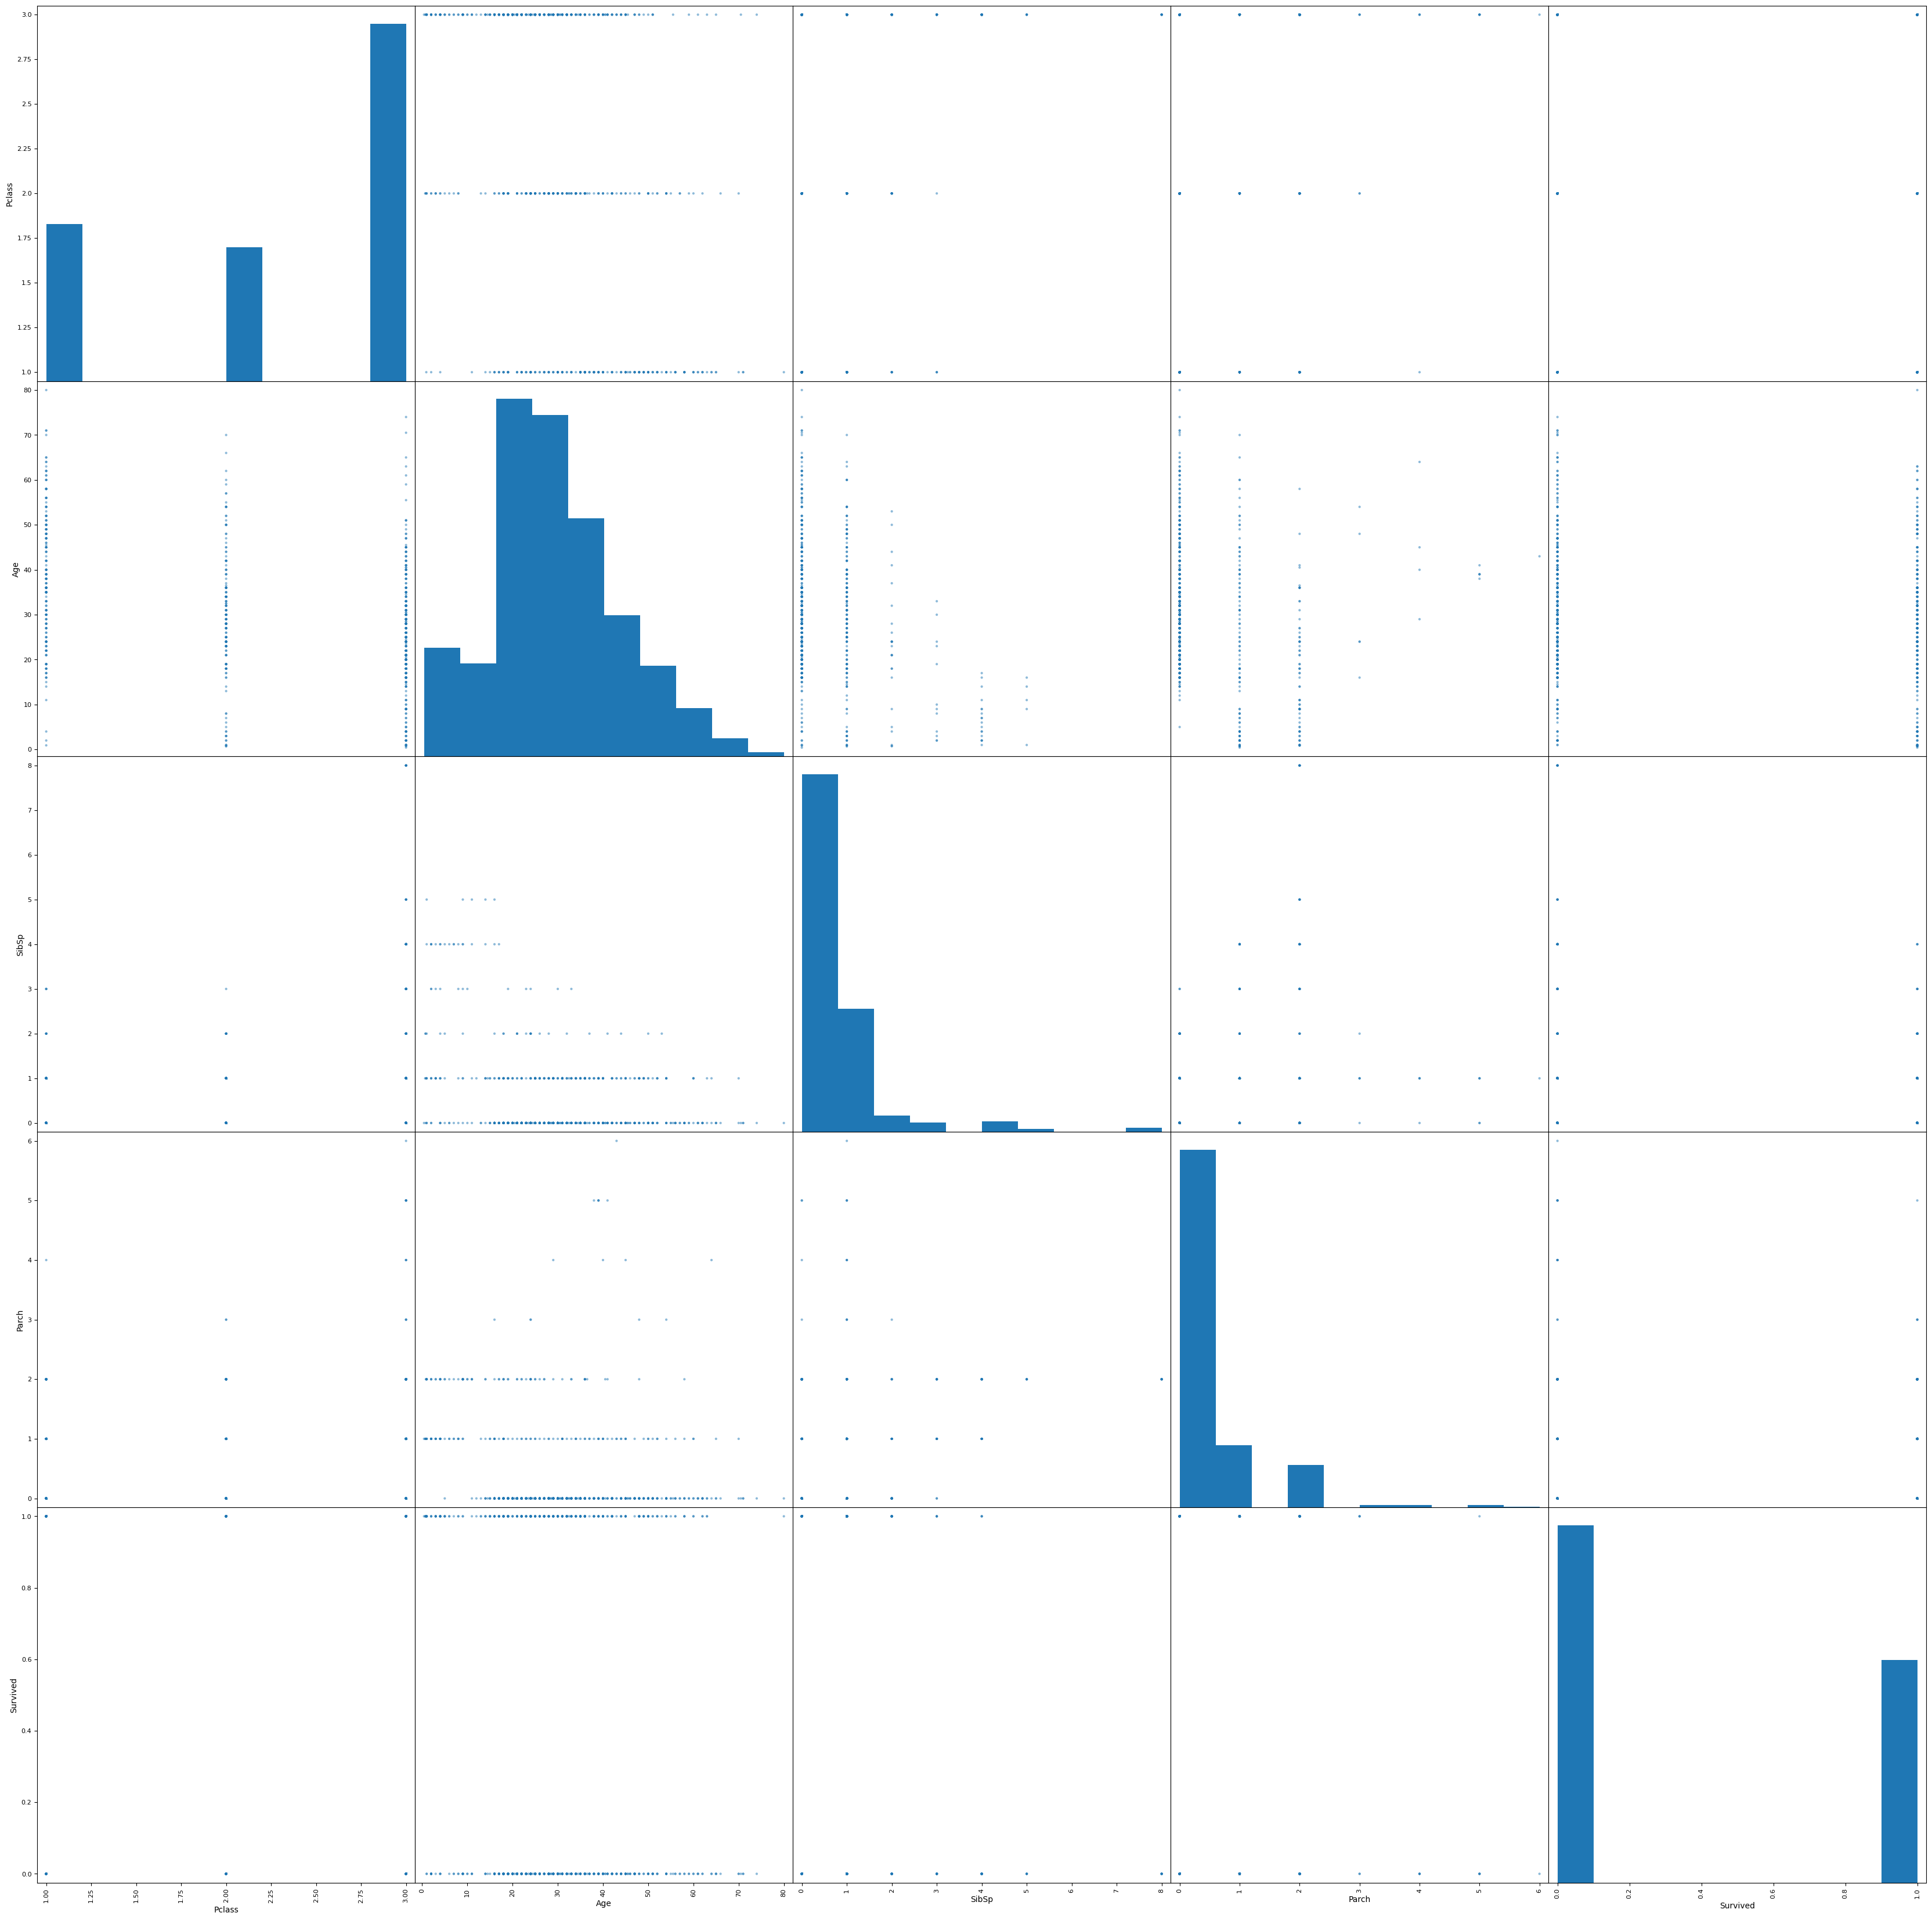

In [4]:
pd.plotting.scatter_matrix(train[["Pclass", "Sex", "Age", "SibSp", "Parch", "Survived"]], figsize=(42, 42))
plt.savefig(r"scatter-matrix.png")

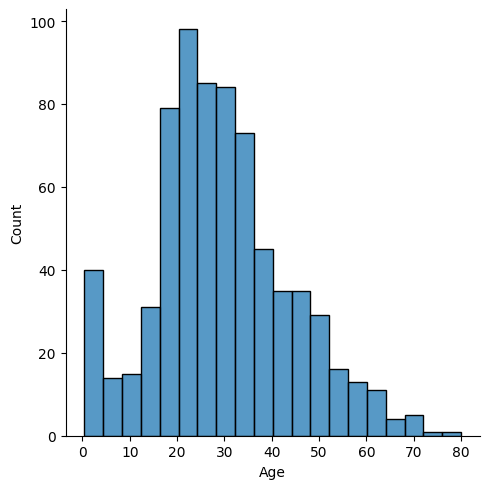

In [5]:
sns.displot(train, x="Age")

/home/pogramist/.local/lib/python3.8/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/home/pogramist/.local/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1560: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


<AxesSubplot: xlabel='SibSp', ylabel='Age'>

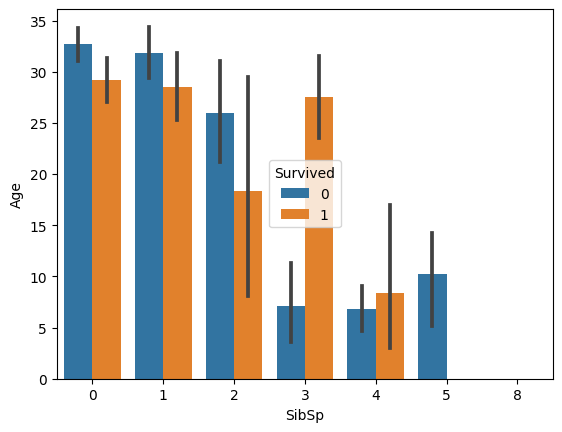

In [6]:
sns.barplot(data=train, x="SibSp", y="Age", hue="Survived")

<AxesSubplot: xlabel='Parch', ylabel='Age'>

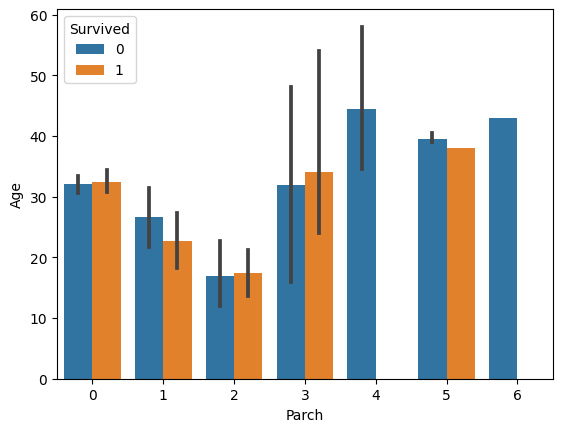

In [7]:
sns.barplot(data=train, x="Parch", y="Age", hue="Survived")

<AxesSubplot: xlabel='Pclass', ylabel='Age'>

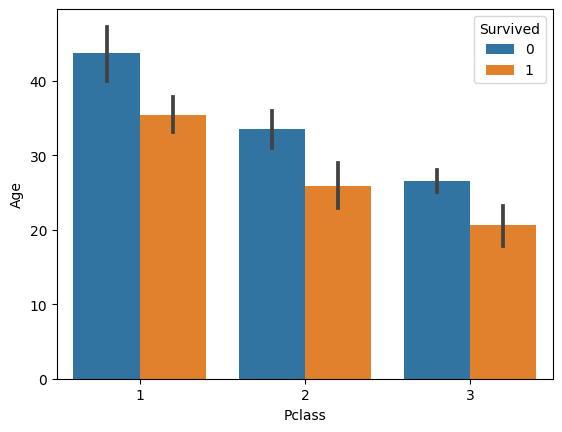

In [8]:
sns.barplot(data=train, x="Pclass", y="Age", hue="Survived")

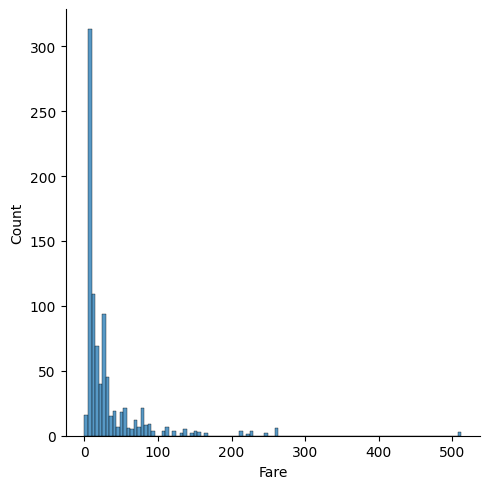

In [9]:
sns.displot(train, x="Fare")

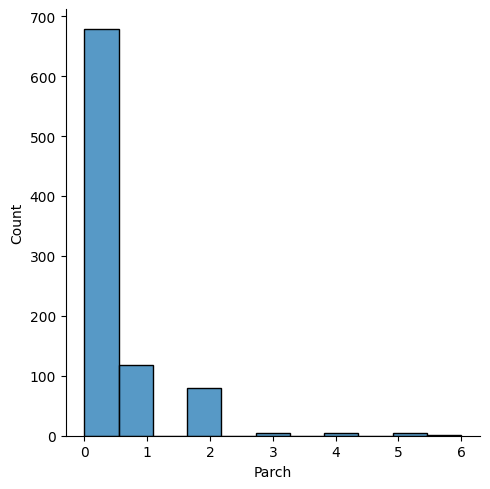

In [10]:
sns.displot(train, x="Parch")

In [11]:
# train[(train["Parch"] == 0) & (train["Age"] < 16.)]
print(train[train["Age"] <= 0].shape)
print(train[(train["Age"] > 0) & (train["Age"] <= 16)].shape)
print(train[(train["Age"] > 16) & (train["Age"] <= 30)].shape)
print(train[(train["Age"] > 30) & (train["Age"] <= 50)].shape)
print(train[(train["Age"] > 50)].shape)

(0, 12)
(100, 12)
(309, 12)
(241, 12)
(64, 12)


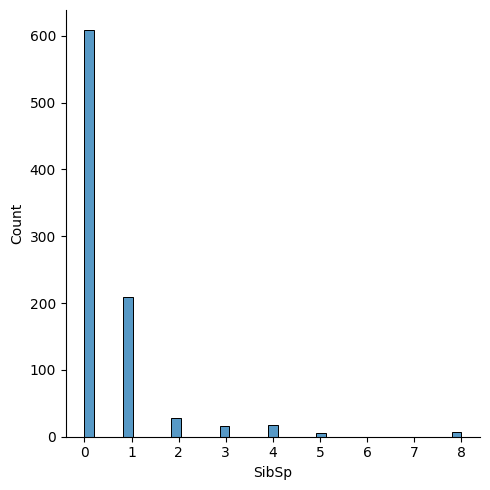

In [12]:
sns.displot(train, x="SibSp")

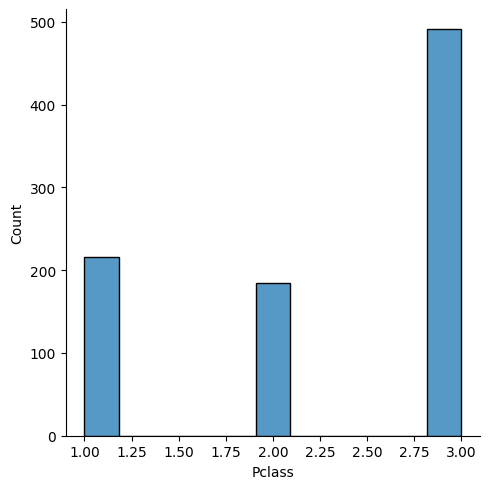

In [13]:
sns.displot(train, x="Pclass")

In [14]:
train.loc[:, ~train.columns.isin(["PassengerId"])].select_dtypes(exclude=["object"]).corr()["Survived"].sort_values(ascending=False)

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Pclass     -0.338481
Name: Survived, dtype: float64

# Идеи для анализа

1. Анализ возраста (подстановка - но использовать не среднее/мода/медиана, а небольшой разброс с неким шагом относительно моды в +- в случайном порядке - чтобы в распределении не вычленять одно значение; либо проанализировать имеющиеся диапазоны - страты - их процентное соотношение и в зависимости от соотношения "разбрасывать" их в пропущенных данных)
2. Анализ кабин (группировка в зависимости от расположения - верхняя палуба, дальние комнаты - в категории (условно по 20-50 комнат); но это, если есть взаимосвязь между расположением комнаты и выживаемостью)
3. Анализ родственных связей (группировка при кодировании в зависимости от выживаемости + ВОЗМОЖНО, построение новых признаков - если есть взаимосвязь между связями с родителями и детьми у человека с точки зрения выживаемости)

- Анализ пола: соотношение выживших/погибших среди мужчин и среди женщин - выживаемость человека с каким полом вероятнее?

### Анализ пола
Очевидна зависимость: мужчины обладают меньшими шансами на выживание (видим, связано с тем, что в первую очередь, спасали женщин и детей)

/tmp/ipykernel_5097/2148623229.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survived_by_sex["Survived"].replace(0, "Death", inplace=True)
/tmp/ipykernel_5097/2148623229.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survived_by_sex["Survived"].replace(1, "Survive", inplace=True)


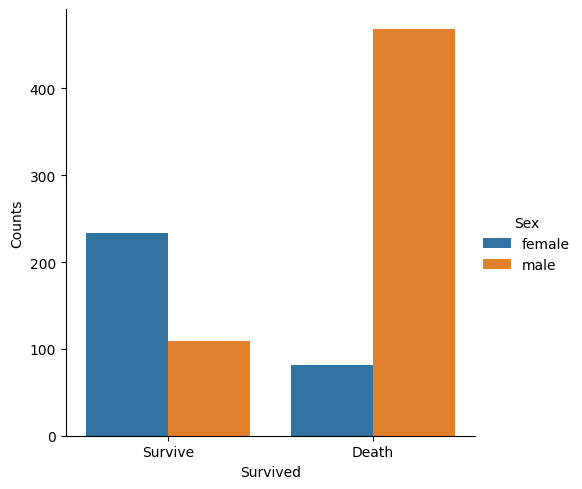

In [67]:
survived_by_sex = train[["Survived", "Sex"]]
survived_by_sex["Survived"].replace(0, "Death", inplace=True)
survived_by_sex["Survived"].replace(1, "Survive", inplace=True)
survived_by_sex = survived_by_sex\
    .groupby(by="Sex")\
    .value_counts()\
    .reset_index()\
    .rename(columns={0: "Counts"})

sns.catplot(
    data=survived_by_sex,
    x="Survived",
    y="Counts",
    hue="Sex",
    kind="bar")